## ПІДСУМКОВА КОНТРОЛЬНА РОБОТА
## МАШИННЕ НАВЧАННЯ
## Авдєєва Серафима ФІТ 4-4
## Завдання 3

Розробити згорткову нейронну мережу для розпізнавання
зображень датасету
cifar_10

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Нормалізація

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# Створення згорткової нейронної мережі
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [4]:
# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Виведення інформації про модель
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [6]:
# Навчання моделі
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 91s 114ms/step - loss: 1.6083 - accuracy: 0.4115 - val_loss: 1.4683 - val_accuracy: 0.4751
Epoch 2/10
782/782 [==============================] - 83s 106ms/step - loss: 1.2669 - accuracy: 0.5483 - val_loss: 1.2054 - val_accuracy: 0.5735
Epoch 3/10
782/782 [==============================] - 79s 100ms/step - loss: 1.1163 - accuracy: 0.6061 - val_loss: 1.1112 - val_accuracy: 0.6067
Epoch 4/10
782/782 [==============================] - 79s 101ms/step - loss: 1.0088 - accuracy: 0.6466 - val_loss: 1.0288 - val_accuracy: 0.6363
Epoch 5/10
782/782 [==============================] - 84s 107ms/step - loss: 0.9332 - accuracy: 0.6737 - val_loss: 0.9392 - val_accuracy: 0.6703
Epoch 6/10
782/782 [==============================] - 80s 103ms/step - loss: 0.8750 - accuracy: 0.6957 - val_loss: 0.9396 - val_accuracy: 0.6731
Epoch 7/10
782/782 [==============================] - 79s 101ms/step - loss: 0.8249 - accuracy: 0.7116 - val_loss: 0.8962 - val_ac

In [10]:
# Оцінка точності моделі на тестовому наборі
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 5s 15ms/step - loss: 0.9361 - accuracy: 0.6890
Test accuracy: 0.6890000104904175


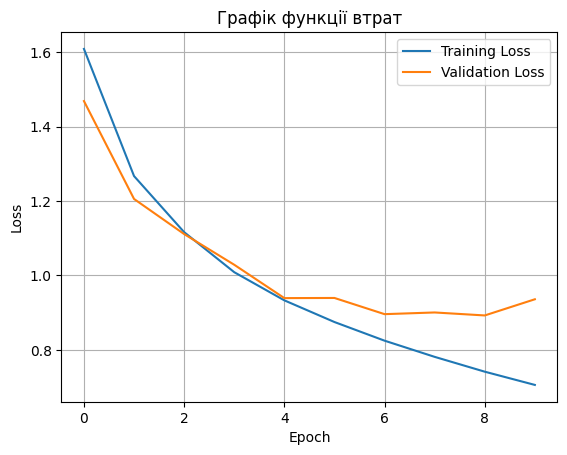

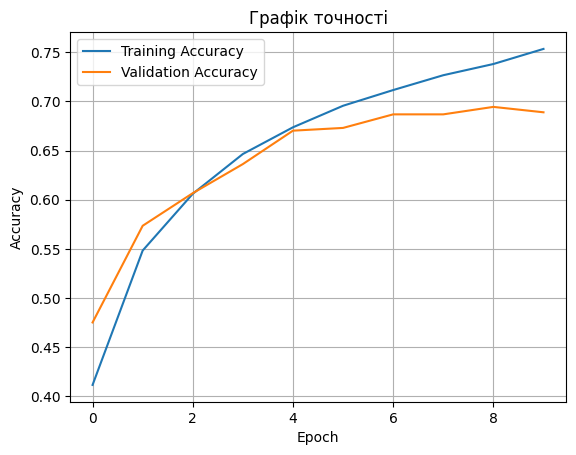

In [11]:
# Виведення графіків функції втрат та точності
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Графік функції втрат")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Графік точності")
plt.grid()
plt.legend()
plt.show()

1/1 [==============================] - 0s 212ms/step
Image 1: Predicted Class 2, True Class 2
Image 2: Predicted Class 1, True Class 9
Image 3: Predicted Class 6, True Class 6
Image 4: Predicted Class 1, True Class 9
Image 5: Predicted Class 3, True Class 3
Image 6: Predicted Class 8, True Class 8
Image 7: Predicted Class 8, True Class 8
Image 8: Predicted Class 7, True Class 3
Image 9: Predicted Class 7, True Class 7
Image 10: Predicted Class 6, True Class 6


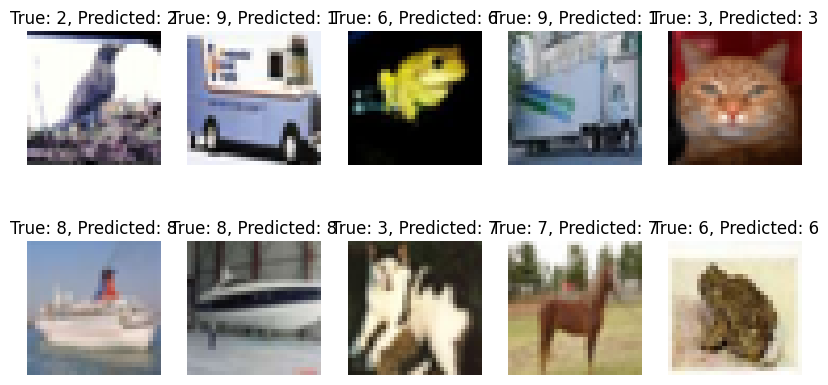

In [13]:
# Розпізнавання 10 випадкових зображень
random_indices = np.random.choice(test_images.shape[0], 10, replace=False)
random_images = test_images[random_indices]
predictions = model.predict(random_images)

# Виведення результатів розпізнавання
for i in range(10):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(test_labels[random_indices[i]])
    print(f"Image {i + 1}: Predicted Class {predicted_class}, True Class {true_class}")

# Виведення зображень для перевірки
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[random_indices[i]])}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()

# Висновок

Під час виконання цього завдання було створено та навчено згорткову нейронну мережу для розпізнавання зображень на датасеті CIFAR-10.

Архітектура мережі: Була використана згорткова нейронна мережа з трьома згортковими шарами, пулінговими шарами, та повнозв'язаними шарами.

Параметри навчання: Кількість епох для навчання була обмежена 10, оскільки згорткові моделі можуть вимагати значної кількості часу для навчання. Розмір пакету (batch_size) обрали рівний 64.

Функції активації та функція втрат: Використовувалися ReLU для згорткових шарів та softmax для останнього повнозв'язаного шару. Функція втрат була встановлена як категоріальна перехресна ентропія.

Навчання та оцінка результатів: Модель навчалася на тренувальному датасеті та оцінювалася на тестовому. Була зроблена оцінка точності та втрат. Також були побудовані графіки точності та втрат для тренувального та валідаційного наборів. Це дозволяє оцінити ефективність моделі та виявити ознаки перенавчання або недонавчання.

Розпізнавання зображень: навчену модель було використано для розпізнавання десяти вибраних випадково зображень. 7 із 10 зображень модель класифікувала правильно.

Побудована згорткова нейронна мережа демонструє достатньо високу (0.6890)точність на тестовому датасеті CIFAR-10, що підтверджує ефективність використання такого типу архітектури для задач розпізнавання зображень.